# # Webscraping Project - Youtube

# Examining the hottest topics in "global breaking news" on 1st page of Youtube

In this project I will be scraping the data obtained on the front page of Youtube after searching "global breaking news".

I will parse the data and divide it into several categories and use this for my analysis.

By analysing the data, we will examine what are the hottest headlines and topics in "global breaking news" according to Youtube. 

# Relevance to everyday life:
- Code produces the results for "global breaking news" on the front page at any given time on Youtube. 
- Could help us answer : What do we find most important in our news source? What topics are we most interested in hearing about for global news? (eg. understanding our audience)

In [1]:
#Importing and installing libraries / packages 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install python-dateutil #used to get accurate cleaning of time data

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install nltk

In [4]:
from nltk.corpus import stopwords #used to clean the non-numerical data

In [5]:
pip install wordcloud #installing library to plot non-numerical data

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv('/Users/joycechung/PycharmProjects/pythonProject/pythonProject/Unit 2 - Pandas, EDA.../Lessons & Exercises/Web Scraping Project/youtube_video_2024_01_18.csv', low_memory=False)
#how the scrape occured:
#The code used to webscrape and create the dataframe and load to csv is on Pycharm
#I used selenium to load the youtube webpage, and beautiful soup to parse the data 
#I used for loop to filter out the contents of the data eg. time-based content (time posted)
#Index-location is used to obtain the title and the caption, as well as the channel name.

#some elements such as "LIVE" which indicates any livestreaming videos, were filtered out. 
#Thus they are not posted in my dataset.

#the name of the project csv will change based on today's date
#the data in the csv will change based on the day

# Webscraping the search results page of Youtube using the phrase "global breaking news"

I used the Selenium library on Pycharm to scrape the search engine results of this phrase from Youtube. 
On Pycharm, I parsed the data from a txt format into a dataframe that was loaded into a .csv file. 

The dataframe has several categories: 
title, views, time posted, channel name, and a preview of the caption (what is visible on the first page of Youtube immediately after the search phrase is entered.)

Now, I am reading the .csv file. I will be cleaning this data with regular expressions and then using matplotlib to visualise the data to conduct analysis. 


In [7]:
#The dataframe 
#original columns on the left, cleaned data is labelled on the right 

df

,Title,Views,Time Posted,Channel Name,Caption
0,BC storm: Snowfall brings day of fun in Metro ...,4.3K views,4 hours ago,Global News,The snowfall on B.C.'s South Coast Wednesday w...
1,How Hamas and Israel's information war is infl...,1.5K views,4 hours ago,Global News,While Hamas and Israel's violent conflict has ...
2,Pakistan accuses Iran of unprovoked airstrike,159K views,18 hours ago,CBS Mornings,Tensions in the Middle East intensify as Pakis...
3,"Global National: Jan. 17, 2024 | Heavy snowfal...",15K views,5 hours ago,Global News,In tonight's top story: While the rest of Cana...
4,State Dept Asked Point Blank: 'Do You Think Ir...,126K views,11 hours ago,Forbes Breaking News,State Department spokesperson Matthew Miller w...
5,Pentagon Spokesperson Answers Reporter Questio...,114K views,7 hours ago,Forbes Breaking News,"On Wednesday, Pentagon Spokesperson Major Gene..."
6,US Aid to Ukraine IS OVER: Zelensky Visits Dav...,103K views,1 day ago,The Hill,Briahna Joy Gray and Robby Soave discuss updat...
7,Pakistan blames Iran for unprovoked airstrike ...,195K views,18 hours ago,CBS News,Tensions in the Middle East intensify as Pakis...
8,World Economic Forum for 2024 in Davos kicks o...,373 views,2 days ago,Arirang News,다보스포럼 개막 안보 위기 고조 속 해법 모색 The annual World Eco...
9,Leaked docs reveal world leaders are preparing...,282K views,1 day ago,Fox Business,"Rep. Pat Fallon, R-Texas, discusses the ongoin..."


# Data Cleaning 

In [8]:
#Cleaning the Views data into numerical format with regular expression
import re

# Define a function to clean the views data
def clean_views(views):
    if views:
        value = re.findall(r'(\d+(\.\d+)?)([KM])', views)
        if value:
            value, decimal, multiplier = value[0]
            value = float(value)
            
            if multiplier == 'K':
                value *= 1000
            elif multiplier == 'M':
                value *= 1000000

            return int(value)
    
    return None

# Apply the clean_views function to create a new column 'Views_Cleaned'
df['Views Cleaned'] = df['Views'].apply(clean_views)

In [9]:
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta # represents an interval of time.

# Define a function to clean the time values
#regular expression
def clean_time(time):
    value = re.findall(r'(\d+)', time)
    unit = re.findall(r'(hour|day|month|minute)', time)
    
    if value and unit:
        value = int(value[0])
        unit = unit[0]
        
        if unit == 'hour':
            return value
        elif unit == 'day':
            return value * 24
        elif unit == 'month':
            current_date = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
            target_date = current_date - relativedelta(months=value)  #because different months have different lengths
            hours_diff = (current_date - target_date).days * 24
            return hours_diff
        elif unit == 'minute': #so that videos posted under 1 hour ago are not NaN values, however they still show up as value '0'
            return value // 60
    
    return None

# Apply the clean_time function to create a new column 'Time Posted Cleaned'
df['Time Posted Cleaned'] = df['Time Posted'].apply(clean_time)

In [10]:
#Splitting up the non-numerical data (video title, channel name, caption) into words by using white-space separator

# Define functions to split the non-numerical data into words
def split_title(title):
    if isinstance(title, str):
        return title.split()
    else:
        return []

def split_channel_name(channel_name):
    if isinstance(channel_name, str):
        return channel_name.split()
    else:
        return []

def split_caption(caption):
    if isinstance(caption, str):
        return caption.split()
    else:
        return []

# Apply the split functions to create new columns with the split words
df['Title_Split'] = df['Title'].apply(split_title)
df['Channel_Name_Split'] = df['Channel Name'].apply(split_channel_name)
df['Caption_Split'] = df['Caption'].apply(split_caption)

# Data Summarisation 
Reducing video title, channel name and caption into the key points. (removing stop words)

In [11]:
#Removing stopwords from the non-numerical data
import nltk
from nltk.corpus import stopwords

# Create a function to clean the data and remove stop words
def clean_data(column):
    # Concatenate all the lists of words in the column
    all_words = [word for sublist in column for word in sublist]
    
    # Remove stop words
    sr = stopwords.words('english')
    clean_words = [word for word in all_words if word not in sr]
    
    return clean_words

# Clean the data for 'Title_Split'
cleaned_title = clean_data(df['Title_Split'])

# Clean the data for 'Channel_Name_Split'
cleaned_channel_name = clean_data(df['Channel_Name_Split'])

# Clean the data for 'Caption_Split'
cleaned_caption = clean_data(df['Caption_Split'])

In [12]:
#Looking at the type of data collected (old and cleaned)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                20 non-null     object 
 1   Views                20 non-null     object 
 2   Time Posted          20 non-null     object 
 3   Channel Name         20 non-null     object 
 4   Caption              19 non-null     object 
 5   Views Cleaned        18 non-null     float64
 6   Time Posted Cleaned  20 non-null     int64  
 7   Title_Split          20 non-null     object 
 8   Channel_Name_Split   20 non-null     object 
 9   Caption_Split        20 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ KB


# Non-Numerical Data Visualisation 
- What are the most popular key-words in the title of these Youtube videos?
- Which channels are most of these videos being posted by?
- What are the most popular key-words in the caption?

In [13]:
# Creating a frequency plot for title, channel name and caption 
# outputs the 20 most frequently used words for each column

In [14]:
import nltk
import matplotlib.pyplot as plt

# Create a function to compute the frequency distribution and plot the frequency plot
def compute_frequency_plot(data, plot_title):
    # Compute the frequency distribution
    freq = nltk.FreqDist(data)
    
    # Plot the frequency distribution
    freq.plot(20, cumulative=False, title=plot_title)
    plt.show()

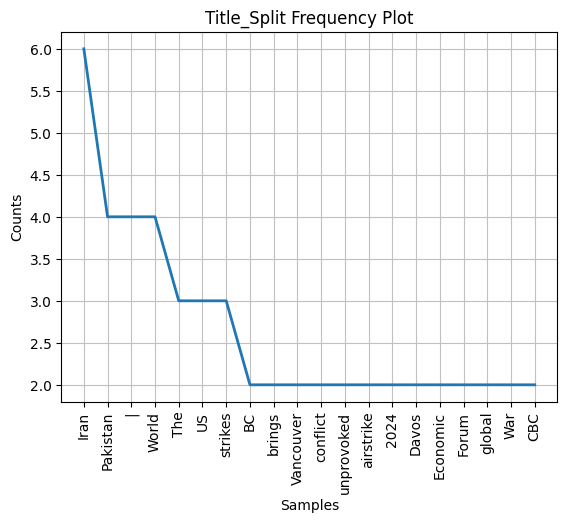

In [15]:
# Compute and plot the frequency distribution for 'Title_Split'
compute_frequency_plot(cleaned_title, "Title_Split Frequency Plot")

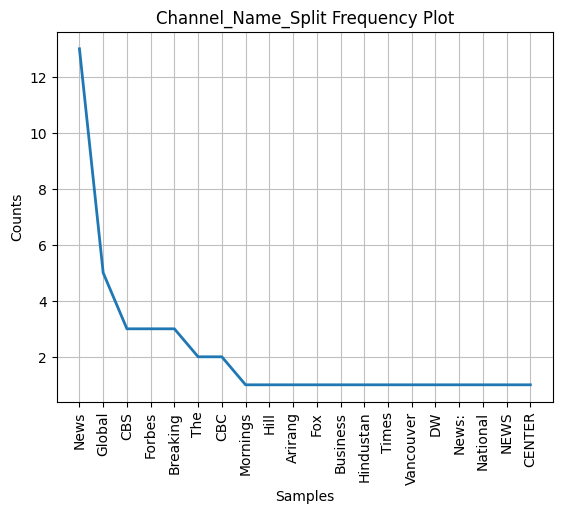

In [16]:
# Compute and plot the frequency distribution for 'Channel_Name_Split'
compute_frequency_plot(cleaned_channel_name, "Channel_Name_Split Frequency Plot")

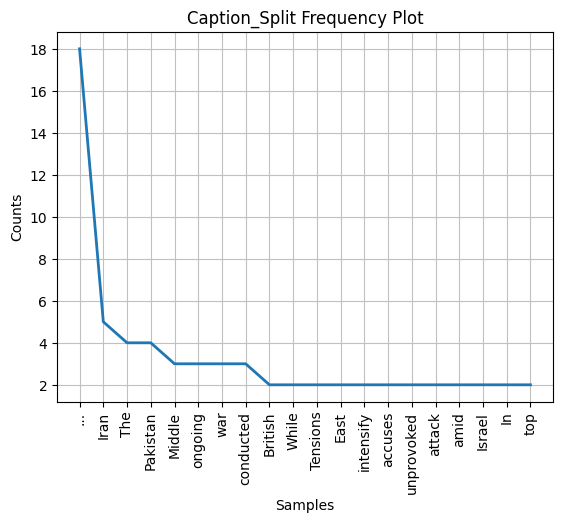

In [17]:
# Compute and plot the frequency distribution for 'Caption_Split'
compute_frequency_plot(cleaned_caption, "Caption_Split Frequency Plot")

In [18]:
#Using wordcloud to visualise the frequency of words used for channel name, caption and video title. 

In [19]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to generate a word cloud
def generate_wordcloud(data, plot_title):
    # Concatenate all the cleaned words in the data
    text = ' '.join(data)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(plot_title)
    plt.show()

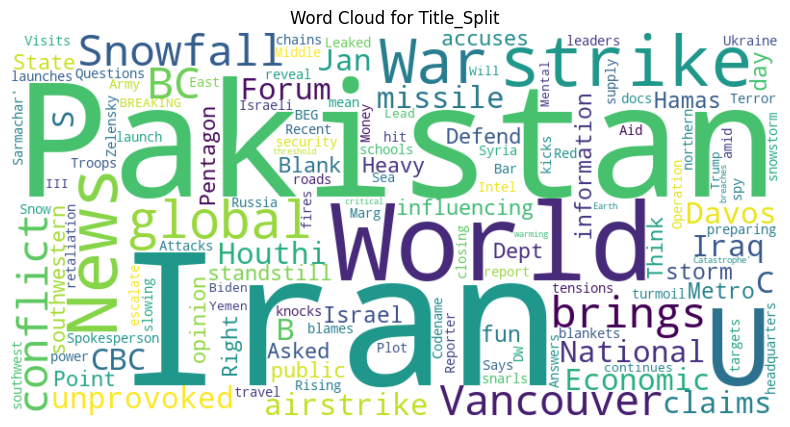

In [20]:
# Generate word cloud for 'Title_Split'
generate_wordcloud(cleaned_title, "Word Cloud for Title_Split")

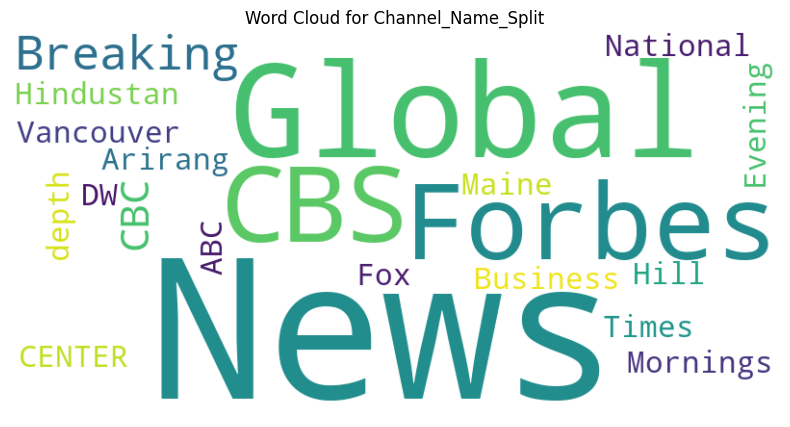

In [21]:
# Generate word cloud for 'Channel_Name_Split'
generate_wordcloud(cleaned_channel_name, "Word Cloud for Channel_Name_Split")

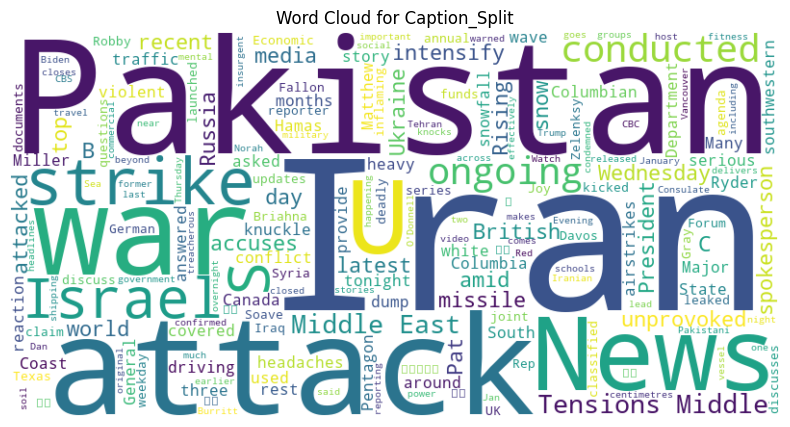

In [22]:
# Generate word cloud for 'Caption_Split'
generate_wordcloud(cleaned_caption, "Word Cloud for Caption_Split")

# Numerical Data Visualisation 
- Which videos have the most views?
- Which videos were posted the most recently on the Youtube page? 

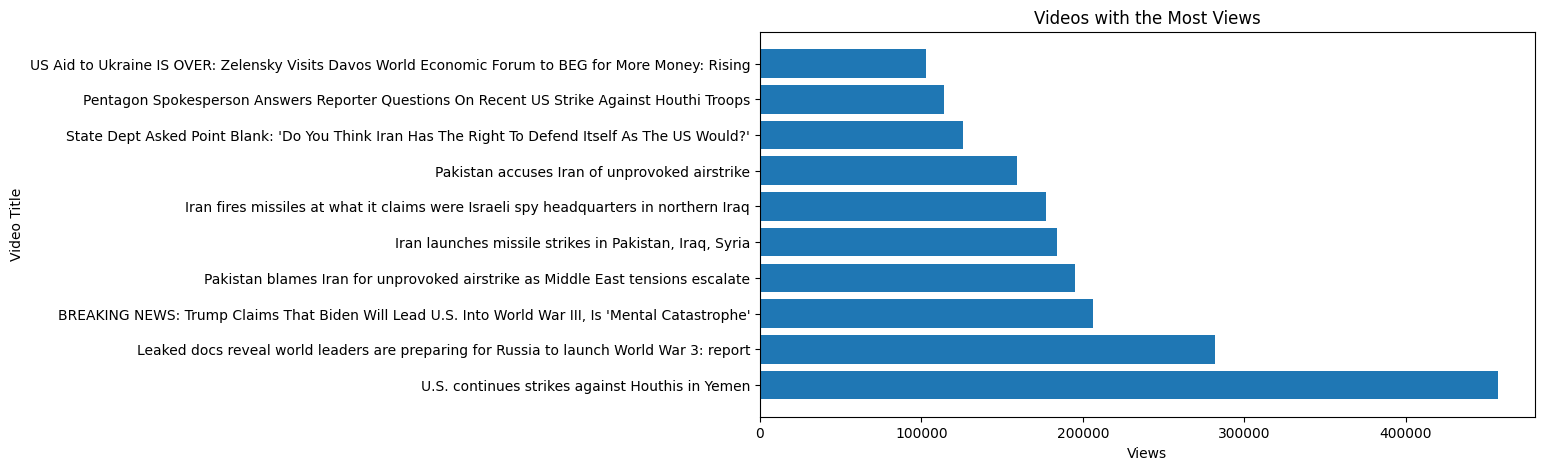

In [23]:
#Videos with the most views 

# Sort the dataframe by 'Views Cleaned' column in descending order to get the videos with the most views
most_viewed_videos = df.sort_values('Views Cleaned', ascending=False).head(10)

# Plot the videos with the most views using a horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(most_viewed_videos['Title'], most_viewed_videos['Views Cleaned'])
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.title('Videos with the Most Views')
plt.show()

In [24]:
#Table of most recent videos 
# Sort the dataframe by 'Time Posted Cleaned' column in ascending order
sorted_df = df.sort_values('Time Posted Cleaned', ascending=True)

# Print the sorted data with corresponding titles
for index, row in sorted_df.iterrows():
    title = row['Title']
    time_posted_cleaned = row['Time Posted Cleaned']
    print(f"Title: {title}")
    print(f"Time Posted: {time_posted_cleaned}")
    print()

Title: Pakistan Attacks Iran: Operation Codename 'Marg Bar Sarmachar'; Army Says Intel Of Terror Plot To...
Time Posted: 0

Title: CBC Vancouver News at 11, Jan 17 - Snow blankets southwest B.C., slowing travel and closing schools
Time Posted: 0

Title: Pakistan retaliation strikes hit targets in Iran | DW News
Time Posted: 1

Title: CBC News: The National | B.C. snowstorm snarls roads, knocks out power
Time Posted: 2

Title: BC storm: Snowfall brings day of fun in Metro Vancouver
Time Posted: 4

Title: How Hamas and Israel's information war is influencing public opinion of conflict
Time Posted: 4

Title: Global National: Jan. 17, 2024 | Heavy snowfall brings southwestern BC to a standstill
Time Posted: 5

Title: Pentagon Spokesperson Answers Reporter Questions On Recent US Strike Against Houthi Troops
Time Posted: 7

Title: State Dept Asked Point Blank: 'Do You Think Iran Has The Right To Defend Itself As The US Would?'
Time Posted: 11

Title: Pakistan accuses Iran of unprovoked airst

In [25]:
sorted_df

,Title,Views,Time Posted,Channel Name,Caption,Views Cleaned,Time Posted Cleaned,Title_Split,Channel_Name_Split,Caption_Split
11,Pakistan Attacks Iran: Operation Codename 'Mar...,3.6K views,24 minutes ago,Hindustan Times,Pakistan government on January 18 confirmed th...,3600.0,0,"[Pakistan, Attacks, Iran:, Operation, Codename...","[Hindustan, Times]","[Pakistan, government, on, January, 18, confir..."
12,"CBC Vancouver News at 11, Jan 17 - Snow blanke...",558 views,Streamed 59 minutes ago,CBC Vancouver,Watch CBC Vancouver News with host Dan Burritt...,NaN,0,"[CBC, Vancouver, News, at, 11,, Jan, 17, -, Sn...","[CBC, Vancouver]","[Watch, CBC, Vancouver, News, with, host, Dan,..."
13,Pakistan retaliation strikes hit targets in Ir...,19K views,1 hour ago,DW News,Pakistan said Thursday it had conducted overni...,19000.0,1,"[Pakistan, retaliation, strikes, hit, targets,...","[DW, News]","[Pakistan, said, Thursday, it, had, conducted,..."
14,CBC News: The National | B.C. snowstorm snarls...,4.2K views,2 hours ago,CBC News: The National,"Jan. 17, 2024 | As much as 30 centimetres of s...",4200.0,2,"[CBC, News:, The, National, |, B.C., snowstorm...","[CBC, News:, The, National]","[Jan., 17,, 2024, |, As, much, as, 30, centime..."
0,BC storm: Snowfall brings day of fun in Metro ...,4.3K views,4 hours ago,Global News,The snowfall on B.C.'s South Coast Wednesday w...,4300.0,4,"[BC, storm:, Snowfall, brings, day, of, fun, i...","[Global, News]","[The, snowfall, on, B.C.'s, South, Coast, Wedn..."
1,How Hamas and Israel's information war is infl...,1.5K views,4 hours ago,Global News,While Hamas and Israel's violent conflict has ...,1500.0,4,"[How, Hamas, and, Israel's, information, war, ...","[Global, News]","[While, Hamas, and, Israel's, violent, conflic..."
3,"Global National: Jan. 17, 2024 | Heavy snowfal...",15K views,5 hours ago,Global News,In tonight's top story: While the rest of Cana...,15000.0,5,"[Global, National:, Jan., 17,, 2024, |, Heavy,...","[Global, News]","[In, tonight's, top, story:, While, the, rest,..."
5,Pentagon Spokesperson Answers Reporter Questio...,114K views,7 hours ago,Forbes Breaking News,"On Wednesday, Pentagon Spokesperson Major Gene...",114000.0,7,"[Pentagon, Spokesperson, Answers, Reporter, Qu...","[Forbes, Breaking, News]","[On, Wednesday,, Pentagon, Spokesperson, Major..."
4,State Dept Asked Point Blank: 'Do You Think Ir...,126K views,11 hours ago,Forbes Breaking News,State Department spokesperson Matthew Miller w...,126000.0,11,"[State, Dept, Asked, Point, Blank:, 'Do, You, ...","[Forbes, Breaking, News]","[State, Department, spokesperson, Matthew, Mil..."
2,Pakistan accuses Iran of unprovoked airstrike,159K views,18 hours ago,CBS Mornings,Tensions in the Middle East intensify as Pakis...,159000.0,18,"[Pakistan, accuses, Iran, of, unprovoked, airs...","[CBS, Mornings]","[Tensions, in, the, Middle, East, intensify, a..."


# Further analysis:

From the video that attracted the most views, what are the most frequent keywords from its title and caption?

In [26]:
from collections import Counter
from nltk.corpus import stopwords

# Get the top most viewed video
top_most_viewed_video = df.sort_values('Views Cleaned', ascending=False).iloc[0]

# Clean the title
title = top_most_viewed_video['Title_Split']
cleaned_title = [word for word in title if word not in stopwords.words('english')]

# Clean the caption
caption = top_most_viewed_video['Caption_Split']
cleaned_caption = [word for word in caption if word not in stopwords.words('english')]

# Extract keywords from the title and caption
title_keywords = set(cleaned_title)
caption_keywords = set(cleaned_caption)

# Combine the keywords from title and caption
keywords = title_keywords.union(caption_keywords)

# Calculate the frequency of each keyword
keyword_frequencies = Counter(keywords)

# Get the most common keywords and their frequencies
top_keywords = keyword_frequencies.most_common(10)
top_keywords, frequencies = zip(*top_keywords)

# Print the most common keywords and their frequencies
for keyword, frequency in zip(top_keywords, frequencies):
    print(f"Keyword: {keyword.strip()}")
    print(f"Frequency: {frequency}")
    print()

Keyword: beyond
Frequency: 1

Keyword: Houthis
Frequency: 1

Keyword: goes
Frequency: 1

Keyword: delivers
Frequency: 1

Keyword: ...
Frequency: 1

Keyword: News
Frequency: 1

Keyword: original
Frequency: 1

Keyword: headlines
Frequency: 1

Keyword: news
Frequency: 1

Keyword: "CBS
Frequency: 1



Conclusion:

Q: From the deeper analysis, can we deduce the hottest topics re: global breaking news these days? 


A: 
If we're basing the "hotness" of a topic on total number of views and frequency of keywords, then we identified some of the hottest topics for this search term on Youtube 

We can also see when the video containing the hottest topic was published and the channel name. 

Evaluation:

This code only extracts what is seen on the front page of Youtube. 
It doesn't look at the next couple of pages which may skew our results as it reduces the total sample size of the data. 

I didn't program Selenium to click into the videos to get the full caption and more details on the video. 

If I had done that, my analysis might be even more comprehensive. 